In [1]:
import os

import IPython.display as ipd
import pandas as pd
import numpy as np
import seaborn as sns
import librosa
import soundfile as sf
import re
import scipy
import matplotlib.pyplot as plt

from glob import glob
%matplotlib inline

/tmp/ipykernel_1614864/3768209760.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Agenda
1. [Intro in Audio ML](#Intro_in_Audio_ML)
    1. [Use Cases](#Use_Cases)
    2. [Algorithms](#Algorithms)
    3. [Difference with other ML spheres](#Difference_with_other_ML_spheres)
2. [Digital Audio Representation](#Digital_Audio_Representation) 
3. [Spectral audio representation](#Spectral_audio_representation)
4. [Homework](#Homework)

<a id='Intro_in_Audio_ML'></a>
# Intro in Audio ML

<a id='Use_Cases'></a>
## Use Cases

## [Audio Classification](https://paperswithcode.com/task/audio-classification)

Audio Classification is a machine learning task that involves identifying and tagging audio signals into different classes or categories. The goal of audio classification is to enable machines to automatically recognize and distinguish between different types of audio, such as music, speech, and environmental sounds.

**Academia Examples:**

- [AudioSet](https://paperswithcode.com/dataset/audioset) is an audio event dataset, which consists of over 2M human-annotated 10-second video clips. These clips are collected from YouTube, therefore many of which are in poor-quality and contain multiple sound-sources. A hierarchical ontology of 632 event classes is employed to annotate these data, which means that the same sound could be annotated as different labels. For example, the sound of barking is annotated as Animal, Pets, and Dog.
- [Speech Commands](https://paperswithcode.com/dataset/speech-commands) is an audio dataset of spoken words designed to help train and evaluate keyword spotting systems.
- [BirdCLEF](https://www.kaggle.com/competitions/birdclef-2023/overview) — task to identify bird calls in soundscapes.

**Industry Examples:**

- [Harmful Brain Activity Classification](https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification) — the task is to classify seizures and other patterns of harmful brain activity in critically ill patients.
- Music Recommendation Systems — use ML audio classification to analyze music tracks and recommend songs to users based on their listening habits. Features like tempo, genre, and instrumentation are analyzed to create personalized playlists.
- [Zvook](https://www.youtube.com/watch?v=pYS3hrKfVKU) — detect and classify enemy flying objects: missiles, jets, planes, drones.

![Zvook classification example](images/diagrams-diagram_zvook.drawio.png)

## [Speech Recognition](https://paperswithcode.com/task/speech-recognition)

Speech Recognition is the task of converting spoken language into text. It involves recognizing the words spoken in an audio recording and transcribing them into a written format. The goal is to accurately transcribe the speech in real-time or from recorded audio, taking into account factors such as accents, speaking speed, and background noise.

Speech Recognition is widely called Automatic Speech Recognition (ASR).

**Examples**

- Voice-Activated Virtual Assistants — Devices like Amazon Echo (Alexa), Google Home, and Apple's Siri use ASR to understand and process user commands, allowing users to perform tasks like setting reminders, playing music, or controlling smart home devices through voice commands.
- Transcription Services — ASR is used to convert speech into written text in real-time or from recorded audio, aiding journalists, students, or professionals who want to transcribe meetings, interviews, or lectures.
- Customer Service and Call Centers — ASR systems are employed in Interactive Voice Response (IVR) systems to direct callers to the appropriate department or provide automated responses, enhancing customer service efficiency.
- Media and Entertainment — ASR is used for generating subtitles and closed captions in real-time for live broadcasts or for pre-recorded shows and movies, making content more accessible to a wider audience, including those with hearing impairments.

![](images/diagrams-speech_recognition.drawio.png)

## [Emotion Recognition](https://paperswithcode.com/task/emotion-recognition)

Emotion Recognition is an important area of research to enable effective human-computer interaction. Human emotions can be detected using speech signal, facial expressions, body language, and electroencephalography (EEG).

**Examples**

- Customer Service and Support — In call centers and customer support operations, emotion recognition can analyze voice tonality and speech patterns to identify customer emotions, allowing representatives to adjust their approach in real-time for improved service. It can also route calls to the appropriate department based on the customer's emotional state.
- Market Research and Advertising — Companies use emotion recognition in focus groups or while testing advertisements to gauge consumer reactions to products, services, or marketing materials. This helps in understanding consumer behavior and refining marketing strategies.

![](images/diagrams-emotion_recognition.drawio.png)

## [Speech Synthesis](https://paperswithcode.com/task/speech-synthesis)

Speech synthesis is the task of generating speech from some other modality like text, lip movements, etc.

**Subtasks**:

- Text To Speech (TTS) — Synthesize audio from text. [Coqui.ai](https://github.com/coqui-ai/TTS).
- [Text(Speech) To Speech Translation](https://paperswithcode.com/task/text-to-speech-translation) — Synthesize audio in another language from the original one OR original audio + translated text. [SeamlessM4T](https://huggingface.co/spaces/facebook/seamless_m4t).
- Vocoding — Synthesize audio from spectral or other intermidiate representations.

**Examples**:

- Pure TTS services: [Respeecher](https://www.respeecher.com/), [ElevenLabs](https://elevenlabs.io/) and many other startups and companies.
- Assistive Technology for Visually Impaired — TTS is crucial in screen readers and other assistive technologies, enabling visually impaired individuals to consume digital text content, including books, websites, and documents.
- Navigation and GPS Systems — In GPS and navigation apps, TTS provides spoken directions and traffic updates, allowing users to focus on driving without needing to look at the screen.
- Public Announcements — Airports, train stations, and public venues use TTS for announcements, ensuring clear and consistent communication of important information like boarding calls or emergency alerts.
- Audio Books and Storytelling — TTS technology allows for the creation of audiobooks from written content, making literature more accessible and convenient for busy individuals or those who prefer listening over reading.
- Automated News Reading and Podcasts — TTS is used to convert written news articles, blogs, and other content into spoken words, creating automated news reading services or podcasts.

![](images/diagrams-speech_synthesis.drawio.png)

## [Voice Conversion](https://paperswithcode.com/task/voice-conversion)

Voice Conversion is a technology that modifies the speech of a source speaker and makes their speech sound like that of another target speaker without changing the linguistic information.

[**Examples**](https://www.respeecher.com/):

- Clone voices for films or TV shows — dubbing an actor's voice in post-production to bring back the voice of an actor who lost previous voice traits.
- Game dev — synthesize voices for lots of NPCs.
- Animation — create unique voices.
- Healthcare — recreate voices of people with speech disabilities.

![](./images/diagrams-voice_conversion.drawio.png)

### [And many others ...](https://paperswithcode.com/area/audio)

<a id='Algorithms'></a>
## Algorithms

- Algorithm for Spectogram extraction — family of algorithms, which convert audio from waveform into Spectral domain. Examples:
    - Linear Spectogram — [STFT](https://librosa.org/doc/main/generated/librosa.stft.html).
    - [MelSpectogram](https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html).
- TTS — system, which synthesizes audio from text. Maybe End2End (consists of one model) OR Pipeline of models. Examples:
    - End2End Example: [NaturalSpeech](https://arxiv.org/pdf/2205.04421v2.pdf).
    - Pipeline of models: [TortoiseTTS](https://arxiv.org/pdf/2305.07243.pdf).
    - Try [Ukrainian TTS](https://huggingface.co/spaces/robinhad/ukrainian-tts).
- ASR — systems, which transcribe audio — transform audio into text. Model examples:
    - [Whisper](https://huggingface.co/openai/whisper-large-v3).
    - [SeanlessM4T](https://huggingface.co/facebook/seamless-m4t-v2-large).
- Vocoders — neural nets, which transform intermediate audio representations (in most cases spectograms) into waveforms. Model examples:
    - [HiFi GAN](https://arxiv.org/pdf/2210.15533.pdf).
    - [SiFi GAN](https://arxiv.org/pdf/2210.15533.pdf).
    - [WaveGrad](https://arxiv.org/abs/2009.00713).
- Classification Networks — mostly neural nets, which use architectures from CV and NLP tasks.
- Speech to Speech — system, which synthesizes audio from audio. Can be used for:
    - Voice Cloning.
    - Speech Enhancement.
    - Changing Speech characteristics (for example, [pitch](https://en.wikipedia.org/wiki/Vocal_range)).

  Model examples:
    - [NANSY++](https://arxiv.org/pdf/2211.09407.pdf).
    - [VITS](https://arxiv.org/pdf/2106.06103.pdf) can be used both for TTS and Voice Conversion.
    - [AudioSR](https://github.com/haoheliu/versatile_audio_super_resolution) used for Audio Super-Resolution.
- Audio denoisers — used for denoising input audio and "normalizing" recording conditions (for example, removing [reverberation](https://en.wikipedia.org/wiki/Reverberation)). Model examples:
    - [Denoiser from Facebook](https://github.com/facebookresearch/denoiser).
    - Algorithmic approach: [noisereduce](https://github.com/timsainb/noisereduce).
- Audio feature extraction — special models which extract different audio characteristics, which can be objective and subjective:
    - Objective:
        - Pitch or F0 — fundamental frequency.
        - F1, F2, F3, ...
        - Loudness.
        - Phonemes.
    - Subjective:
        - Emotions.
      
    Model examples:
    - [RVMPE](https://arxiv.org/abs/2306.15412v2) for robust F0 extraction.
    - Algorithmic F0 extraction: [WORLD](https://github.com/mmorise/World).
- Self Supervised Models for Intermediate Audio Representations — models, which are learned in self-supervised mode on enormous audio datasets for producing intermediate audio representations. Examples:
    - [Wave2Vec](https://ai.meta.com/blog/wav2vec-20-learning-the-structure-of-speech-from-raw-audio/).
    - [Data2Vec](https://ai.meta.com/research/data2vec-a-general-framework-for-self-supervised-learning-in-speech-vision-and-language/).

<a id='Difference_with_other_ML_spheres'></a>
## Difference with other ML spheres

In some sense, Audio is a pretty "young" ML sphere, which started active development only one decade ago. While we already have had strong ML algorithms for CV (great variety of Conv Nets), NLP (Recurrent Nets, Word Embeddings, and Birth of Attentions), and Classical Data Science (Classical ML approaches). That is why lots of ML algorithms and approaches used in Audio were inspired by previous spheres. 

**Same**

- Audio has a sequential nature. So Reccurent, Attention, and other Sequence approaches can be applied. Model examples:
    - NLP: [Bert](https://huggingface.co/docs/transformers/model_doc/bert). Audio: [HuBert](https://huggingface.co/docs/transformers/model_doc/hubert).
- Audio is sparse, and ROIs (Regions Of Interest) might be located in local tight "clusters." So convolutional approaches can be used for some applications. Model examples:
    - CV: [StyleGAN](https://paperswithcode.com/method/stylegan). Audio: [StyleMelGAN](https://arxiv.org/abs/2011.01557).

**Different**

- Audio is a continuous signal (of course, it is discretized for digital representation). So it can not be treated as some tokens in NLP.
- Audio is high dimensional and sparse, so (in most cases) can not be fed into the algorithm in row form (as image data). In order to handle this Spectral or Self Supervised representations are used.
- Audio and other signals (radio, gravitational, EEG, and others) have "physical" characteristics, which can be extracted or changed using both neural and algorithmic approaches. That is why might need huge and complex feature extraction pipelines.

<a id='Digital_Audio_Representation'></a>
# Digital Audio Representation

We are going to use [VCTK](https://paperswithcode.com/dataset/vctk) dataset. We will download it from [Kaggle dataset](https://www.kaggle.com/datasets/mfekadu/english-multispeaker-corpus-for-voice-cloning).

This CSTR VCTK Corpus includes speech data uttered by 110 English speakers with various accents. Each speaker reads out about 400 sentences, which were selected from a newspaper, the rainbow passage and an elicitation paragraph used for the speech accent archive. 

**Main Features**

- High-quality data — 48K SR.
- Very clean recording conditions.
- Native English speakers.
- Has quite good transcription.
- Has additional information about speakers: sex, accent, age.
- Not very big.
- Widely used for benchmarks.

In [2]:
# # Uncomment it to download
# !kaggle datasets download -d mfekadu/english-multispeaker-corpus-for-voice-cloning
# !unzip english-multispeaker-corpus-for-voice-cloning.zip -d ../../data/

> **Note**: `english-multispeaker-corpus-for-voice-cloning.zip` is 10 GB, so the download process can take quite some time.

In [3]:
!ls ../../data/VCTK-Corpus/VCTK-Corpus/ -lt

total 40
drwxrwxr-x 111 vova vova  4096 Jan 21 12:26 wav48
drwxrwxr-x 110 vova vova  4096 Jan 21 12:24 txt
-rw-rw-r--   1 vova vova  1259 Dec 17  2019 NOTE
-rw-rw-r--   1 vova vova  2672 Dec 17  2019 README
-rw-rw-r--   1 vova vova  3712 Dec 17  2019 speaker-info.txt
-rw-rw-r--   1 vova vova 18951 Dec 17  2019 COPYING


In [4]:
!ls ../../data/VCTK-Corpus/VCTK-Corpus/wav48 -lt | head

total 1736
drwxrwxr-x 2 vova vova 12288 Jan 21 12:26 p376
drwxrwxr-x 2 vova vova 16384 Jan 21 12:26 p374
drwxrwxr-x 2 vova vova 12288 Jan 21 12:26 p364
drwxrwxr-x 2 vova vova 16384 Jan 21 12:26 p363
drwxrwxr-x 2 vova vova 20480 Jan 21 12:26 p362
drwxrwxr-x 2 vova vova 20480 Jan 21 12:26 p361
drwxrwxr-x 2 vova vova 20480 Jan 21 12:26 p360
drwxrwxr-x 2 vova vova 16384 Jan 21 12:26 p351
drwxrwxr-x 2 vova vova 20480 Jan 21 12:26 p347


In [5]:
!ls ../../data/VCTK-Corpus/VCTK-Corpus/wav48/p225/ -lt | head

total 93464
-rw-rw-r-- 1 vova vova  336084 Dec 17  2019 p225_356.wav
-rw-rw-r-- 1 vova vova  299090 Dec 17  2019 p225_357.wav
-rw-rw-r-- 1 vova vova  483408 Dec 17  2019 p225_358.wav
-rw-rw-r-- 1 vova vova  307542 Dec 17  2019 p225_359.wav
-rw-rw-r-- 1 vova vova  295266 Dec 17  2019 p225_363.wav
-rw-rw-r-- 1 vova vova  200808 Dec 17  2019 p225_365.wav
-rw-rw-r-- 1 vova vova  508834 Dec 17  2019 p225_366.wav
-rw-rw-r-- 1 vova vova  336310 Dec 17  2019 p225_298.wav
-rw-rw-r-- 1 vova vova  434732 Dec 17  2019 p225_299.wav
ls: write error: Broken pipe


In [6]:
!cat ../../data/VCTK-Corpus/VCTK-Corpus/speaker-info.txt | head

ID  AGE  GENDER  ACCENTS  REGION  
225  23  F    English    Southern  England
226  22  M    English    Surrey
227  38  M    English    Cumbria
228  22  F    English    Southern  England
229  23  F    English    Southern  England
230  22  F    English    Stockton-on-tees
231  23  F    English    Southern  England
232  23  M    English    Southern  England
233  23  F    English    Staffordshire


In [7]:
wave_pathes = glob(
    "../../data/VCTK-Corpus/VCTK-Corpus/wav48/*/*.wav", recursive=True
)
# In case of Windows
wave_pathes = [wave_path.replace('\\', '/') for wave_path in wave_pathes]

In [8]:
speaker2pathes = dict()
for speaker in set([wave_path.split("/")[-2] for wave_path in wave_pathes]):
    speaker2pathes[speaker] = [
        wave_path for wave_path in wave_pathes if wave_path.split("/")[-2] == speaker
    ]

Number of Speakers: 109


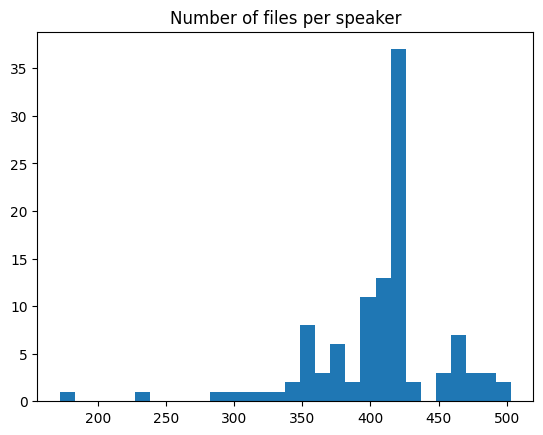

In [9]:
print("Number of Speakers:", len(speaker2pathes))
plt.title("Number of files per speaker")
plt.hist([len(speaker_files) for speaker_files in speaker2pathes.values()], bins=30)
plt.show()

In [10]:
sample_speaker = "p363"
sample_file = speaker2pathes[sample_speaker][10]
ipd.Audio(sample_file)

In [11]:
!cat {sample_file.replace("wav48", "txt").replace(".wav",".txt")}

The United Nations must act.

In [12]:
sample_audio_22050, sample_audio_sr_22050 = librosa.load(sample_file)

Filename: ../../data/VCTK-Corpus/VCTK-Corpus/wav48/p363/p363_328.wav 
Number of data points: 66860 
Sample Rate: 22050 
Length in seconds: 3.032199546485261


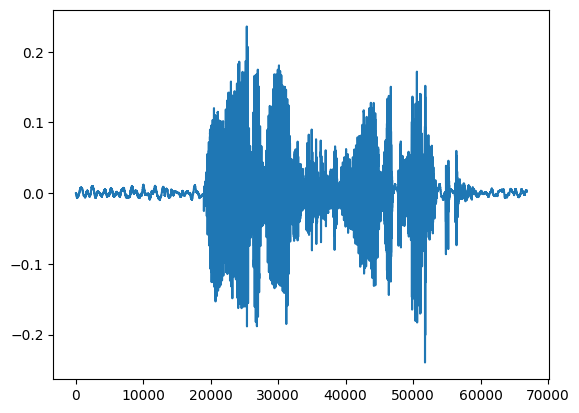

In [13]:
print(
    "Filename:", sample_file,
    "\nNumber of data points:", len(sample_audio_22050),
    "\nSample Rate:", sample_audio_sr_22050,
    "\nLength in seconds:", len(sample_audio_22050) / sample_audio_sr_22050
)

plt.plot(sample_audio_22050);

**What about axis?**

Taken from ChatGPT request: https://chat.openai.com/share/6cd17763-40ad-49de-9255-48821741dd84

- X axis: The x-axis of the waveform represents time. The sample rate of the audio file (e.g., 44.1 kHz) tells you how many samples are captured per second. So if you have a 44.1 kHz sample rate, each sample represents the amplitude of the audio signal at one 44,100th of a second.
- Y axis:
    - Explanation by "Pressure": The numbers you see in the waveform data represent the amplitude of the audio signal at specific points in time. The amplitude corresponds to the air pressure variations caused by sound waves.
    - Explanation by "Voltages": In digital audio, these values are a representation of the voltage levels that were measured by the audio interface during recording. When played back, these values are converted back into voltages, which drive speakers or headphones, ultimately creating sound waves in the air.
    - Explanation by "Man Speaking": Each sample value can be thought of as the position of a speaker cone at a specific moment in time. A value of zero represents the speaker cone being at its resting position (no sound). Positive and negative values represent the speaker cone being pushed and pulled, respectively, creating pressure waves in the air, which we interpret as sound.

[**Sample Rate**](https://en.wikipedia.org/wiki/Sampling_(signal_processing)#Sampling_rate) — is the average number of samples obtained in one second.

![](images/Signal_Sampling.svg.png)

Filename: ../../data/VCTK-Corpus/VCTK-Corpus/wav48/p363/p363_328.wav 
Number of data points: 145545 
Sample Rate: 48000 
Length in seconds: 3.0321875


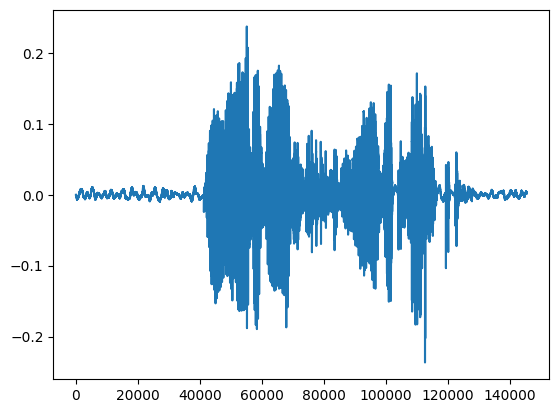

In [14]:
sample_audio_or, sample_audio_sr_or = librosa.load(sample_file, sr=None)

print(
    "Filename:", sample_file,
    "\nNumber of data points:", len(sample_audio_or),
    "\nSample Rate:", sample_audio_sr_or,
    "\nLength in seconds:", len(sample_audio_or) / sample_audio_sr_or
)

plt.plot(sample_audio_or);

Filename: ../../data/VCTK-Corpus/VCTK-Corpus/wav48/p230/p230_351.wav 
Number of data points: 141474 
Sample Rate: 48000 
Length in seconds: 2.947375


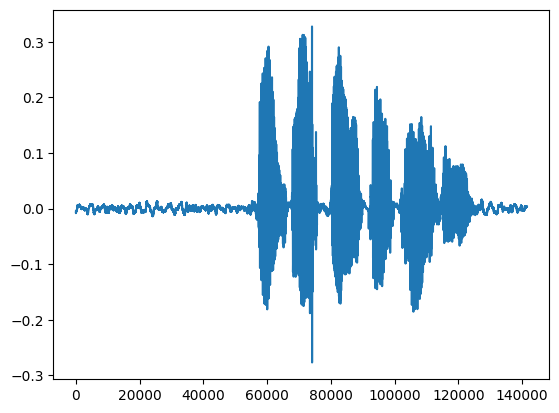

In [15]:
sample_audio_2_or, sample_audio_2_sr_or = librosa.load(speaker2pathes["p230"][10], sr=None)

print(
    "Filename:", speaker2pathes["p230"][10],
    "\nNumber of data points:", len(sample_audio_2_or),
    "\nSample Rate:", sample_audio_2_sr_or,
    "\nLength in seconds:", len(sample_audio_2_or) / sample_audio_2_sr_or
)

plt.plot(sample_audio_2_or);
ipd.Audio(speaker2pathes["p230"][10])

In [16]:
!cat {speaker2pathes["p230"][10].replace("wav48", "txt").replace(".wav",".txt")}

He is not very big, either.


Filename: ../../data/interesting_audio_samples/jet_1.wav 
Number of data points: 88200 
Sample Rate: 44100 
Length in seconds: 2.0


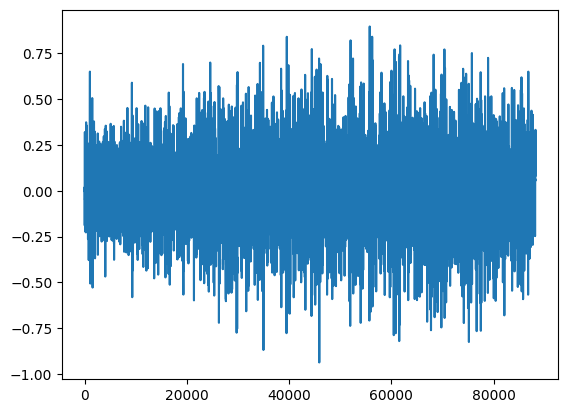

In [17]:
sample_audio_3_or, sample_audio_3_sr_or = librosa.load("../../data/interesting_audio_samples/jet_1.wav", sr=None)

print(
    "Filename:", "../../data/interesting_audio_samples/jet_1.wav",
    "\nNumber of data points:", len(sample_audio_3_or),
    "\nSample Rate:", sample_audio_3_sr_or,
    "\nLength in seconds:", len(sample_audio_3_or) / sample_audio_3_sr_or
)

plt.plot(sample_audio_3_or);
ipd.Audio("../../data/interesting_audio_samples/jet_1.wav")

For manual audio visualisation and editing you may use special Apps:

- [Audacity](https://www.audacityteam.org/).
- [Reaper](https://www.reaper.fm/).

![](images/Screenshot_from_2024-01-21_17-31-29.png)

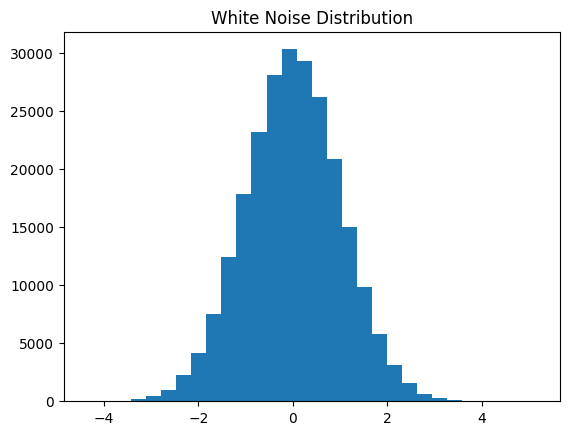

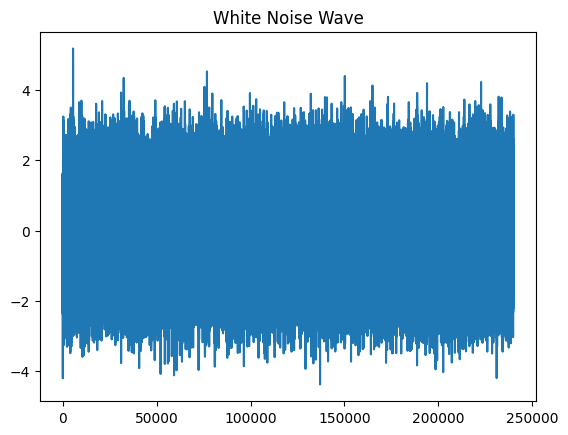

In [18]:
white_noise = np.random.randn(48000 * 5)
plt.title("White Noise Distribution")
plt.hist(white_noise, bins=30)
plt.show()
plt.title("White Noise Wave")
plt.plot(white_noise)
plt.show()
ipd.Audio(data=white_noise,rate=48000)

In [19]:
sf.available_subtypes()

{'PCM_S8': 'Signed 8 bit PCM',
 'PCM_16': 'Signed 16 bit PCM',
 'PCM_24': 'Signed 24 bit PCM',
 'PCM_32': 'Signed 32 bit PCM',
 'PCM_U8': 'Unsigned 8 bit PCM',
 'FLOAT': '32 bit float',
 'DOUBLE': '64 bit float',
 'ULAW': 'U-Law',
 'ALAW': 'A-Law',
 'IMA_ADPCM': 'IMA ADPCM',
 'MS_ADPCM': 'Microsoft ADPCM',
 'GSM610': 'GSM 6.10',
 'G721_32': '32kbs G721 ADPCM',
 'G723_24': '24kbs G723 ADPCM',
 'G723_40': '40kbs G723 ADPCM',
 'DWVW_12': '12 bit DWVW',
 'DWVW_16': '16 bit DWVW',
 'DWVW_24': '24 bit DWVW',
 'VOX_ADPCM': 'VOX ADPCM',
 'NMS_ADPCM_16': '16kbs NMS ADPCM',
 'NMS_ADPCM_24': '24kbs NMS ADPCM',
 'NMS_ADPCM_32': '32kbs NMS ADPCM',
 'DPCM_16': '16 bit DPCM',
 'DPCM_8': '8 bit DPCM',
 'VORBIS': 'Vorbis',
 'OPUS': 'Opus',
 'MPEG_LAYER_I': 'MPEG Layer I',
 'MPEG_LAYER_II': 'MPEG Layer II',
 'MPEG_LAYER_III': 'MPEG Layer III',
 'ALAC_16': '16 bit ALAC',
 'ALAC_20': '20 bit ALAC',
 'ALAC_24': '24 bit ALAC',
 'ALAC_32': '32 bit ALAC'}

How to transform an analog signal to a digital one?

There are two main consequtive procedures:
- Sampling.
- Quantization.

We have already examined Sampling.

Quantization is caused by the "discretization of computers" (Unary numeral system) and different datatypes.

Quantization alone would result like this:

![](images/quantization.png)

Full pipeline:

![](images/analog_to_digital.jpg)


In [20]:
sf.default_subtype("WAV")

'PCM_16'

In [21]:
sf.write(
    file="white_noise.wav",
    data=white_noise,
    samplerate=48000,
)

<a id='Spectral_audio_representation'></a>
# Spectral audio representation

Waveform is a basic representation and can be used in some applications. But it has obvious downsides:

- It is high resolution.
- Information is Sparse.
- Hard to extract some "visual" insides.

We need some alternative features.

## From Fourier transform to "Wave Decomposition"

Let's add a bit of math

![](images/8dc4iu.jpg)

The most popular audio feature is [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform):

![](images/Screenshot_from_2024-01-23_21-41-55.png)

But we will mostly need [Fourier series](https://en.wikipedia.org/wiki/Fourier_series):

![](images/Screenshot_from_2024-01-23_21-43-21.png)

Now lets inplace inf with $N$, we can always do $N \rightarrow \infty$ and rewrite it in different forms:

![](images/Screenshot_from_2024-01-23_21-48-54.png)

> **TODO**: Proove that we can derive from one representation into another.

Lets take a look at some example:

![](images/1_e-_z80BnbHWyFTfRLblJ_w.gif)

## Moving to STFT

Let's consider a waveform, which represents different sounds:

![](images/3-s2.0-B9780128130865000037-f05-09-9780128130865.jpg)

Can we decompose an arbitrary wave into Fourier series with high precision? - Yes, but with a very high value of N.

> <span style="color:red">**TODO**</span>: Why?

But in practice having such a big N value is not reasonable because:

- We again get high resolution data.
- It is an "overfit".

Let's consider an alternative approach. One way to simplify a complex waveform is to split it into windows. "Window" waveforms are much less complex.

> <span style="color:red">**TODO**</span>: Why?

![](images/Short-time-Fourier-transform-STFT-with-envelope-and-two-sample-overlap.png)

So finally we come to Spectogram, where we have:

- X axis: time (Window number).
- Y axis: Frequency (in Hz).
- Intensity: Amplitude of corresponding Frequency in specified window (in dB).

![](images/1_a9epmpqL_X1lGb7bJuCVtA.png)

In [22]:
stft_audio_or = librosa.stft(sample_audio_or)

> **TODO**: Explore parameters of `librosa.stft`.

In [23]:
stft_audio_or

array([[-1.8959047e+00+0.0000000e+00j, -3.2271814e+00+0.0000000e+00j,
         3.0335552e-01+0.0000000e+00j, ...,
         1.1695778e+00+0.0000000e+00j,  5.7410777e-01+0.0000000e+00j,
         1.3221042e+00+0.0000000e+00j],
       [ 5.8722436e-01-1.5531319e+00j,  2.9378421e+00+1.7281951e-01j,
         7.0469297e-02+3.2730699e+00j, ...,
        -3.7005448e-01-1.5256041e+00j,  3.1568012e-01+9.4228977e-01j,
        -1.4413701e+00-1.6016489e-01j],
       [ 7.9401720e-01+7.7667105e-01j, -1.5635974e+00+4.3652682e-03j,
        -2.4700718e-01-1.2908158e+00j, ...,
        -1.4349408e-01+1.0378641e+00j, -1.0168465e+00-1.0771899e+00j,
         1.1480745e+00+6.3639307e-01j],
       ...,
       [ 2.8826504e-03-1.5620432e-03j, -4.3746684e-04-2.3837020e-03j,
         2.2698003e-03+6.2259128e-03j, ...,
         4.6846750e-03+3.8051791e-03j, -4.9412479e-03+1.4605486e-03j,
        -3.4128345e-04-2.8356633e-03j],
       [-1.5760746e-03+1.6755578e-03j,  4.2220363e-03+2.4037957e-03j,
         9.4882248e-04

![](images/8dj1sd.jpg)

Coming back to Fourier series, we can see that first 2 series have 2 sets of coefficients:

1. $D_n$ — real part (Amplitude), $\varphi_n$ — imaginary part (Phase).
2. $A_n$ — real part , $B_n$ — imaginary part.
3. $C_n$ — complex number.

The most frequently used in [DSP](https://en.wikipedia.org/wiki/Digital_signal_processing) is 1st.

Also, in most cases, we need only the real part — Amplitude.

> **TODO**: Express one set of coefficients in terms of another.

> **TODO**: Assume we have a Spectogram (an Amplitude of STFT) as an intermediate feature. How can we formulate a vocoding task?

In [24]:
S_audio_or = np.abs(stft_audio_or)

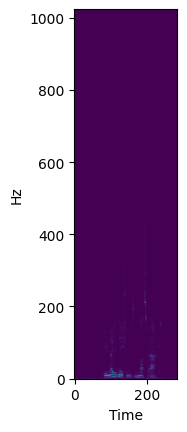

In [25]:
plt.imshow(S_audio_or)
plt.xlabel('Time')
plt.ylabel('Hz')
plt.gca().invert_yaxis()
plt.show()

In [26]:
Sdb_audio_or = librosa.amplitude_to_db(S_audio_or, ref=np.max)

> **TODO**: What does `librosa.amplitude_to_db` do? 

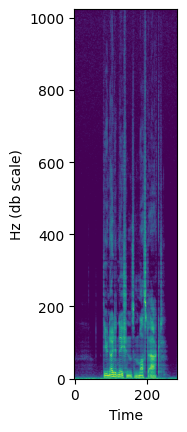

In [27]:
plt.imshow(Sdb_audio_or)
plt.xlabel('Time')
plt.ylabel('Hz (db scale)')
plt.gca().invert_yaxis()
plt.show()

In [28]:
Sdb_audio_22050 = librosa.amplitude_to_db(np.abs(librosa.stft(sample_audio_22050)), ref=np.max)

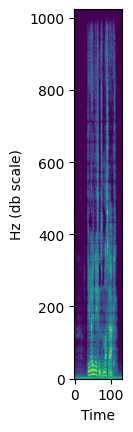

In [29]:
plt.imshow(Sdb_audio_22050)
plt.xlabel('Time')
plt.ylabel('Hz (db scale)')
plt.gca().invert_yaxis()
plt.show()

In [30]:
print(
    "Sdb_audio_or shape:", Sdb_audio_or.shape,
    "\nSdb_audio_22050 shape:", Sdb_audio_22050.shape
)

Sdb_audio_or shape: (1025, 285) 
Sdb_audio_22050 shape: (1025, 131)


Difference in time is logical: less number of points $\Rightarrow$ less number of windows.

Pay attention to the absent amplitudes at the top of `Sdb_audio_22050`.

[**Nyquist–Shannon sampling theorem**](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)

You may read full formulation on Wikipedia but we will simplify it to what we will need:

The maximum possible frequency (in Hz) is equal to Sampling Rate / 2. It does mean that you might have coefficients for higher frequencies but they will be zero (or near zero). In jargon, we call them "fake frequencies".

In [31]:
Sdb_audio_or[-1,:]

array([-80.      , -80.      , -80.      , -80.      , -80.      ,
       -75.70505 , -77.823944, -80.      , -76.57765 , -77.77934 ,
       -75.71115 , -76.45223 , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -80.      , -76.26053 , -70.17467 ,
       -73.10458 , -75.707535, -80.      , -80.      , -80.      ,
       -73.51352 , -77.32576 , -75.43593 , -71.676735, -74.63909 ,
       -80.      , -77.14569 , -72.50514 , -78.924355, -80.      ,
       -80.      , -80.      , -80.      , -74.813354, -69.199234,
       -71.303474, -80.      , -77.95532 , -73.5422  , -80.      ,
       -80.      , -80.      , -78.81351 , -80.      , -80.      ,
       -80.      , -78.25398 , -76.971176, -76.87125 , -73.794655,
       -76.40295 , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -80.      , -75.554794, -79.54256 , -80.      ,
       -80.      , -80.      , -80.      , -80.      , -80.      ,
       -80.      , -71.733826, -69.38033 , -70.38297 , -76.905

In [32]:
Sdb_audio_22050[-1,:]

array([-80., -80., -80., -80., -80., -80., -80., -80., -80., -80., -80.,
       -80., -80., -80., -80., -80., -80., -80., -80., -80., -80., -80.,
       -80., -80., -80., -80., -80., -80., -80., -80., -80., -80., -80.,
       -80., -80., -80., -80., -80., -80., -80., -80., -80., -80., -80.,
       -80., -80., -80., -80., -80., -80., -80., -80., -80., -80., -80.,
       -80., -80., -80., -80., -80., -80., -80., -80., -80., -80., -80.,
       -80., -80., -80., -80., -80., -80., -80., -80., -80., -80., -80.,
       -80., -80., -80., -80., -80., -80., -80., -80., -80., -80., -80.,
       -80., -80., -80., -80., -80., -80., -80., -80., -80., -80., -80.,
       -80., -80., -80., -80., -80., -80., -80., -80., -80., -80., -80.,
       -80., -80., -80., -80., -80., -80., -80., -80., -80., -80., -80.,
       -80., -80., -80., -80., -80., -80., -80., -80., -80., -80.],
      dtype=float32)

Now lets create more "fake" frequencies:

In [33]:
sample_audio_sr_or

48000

In [34]:
sample_audio_or_2_22050 = librosa.resample(sample_audio_or, orig_sr=sample_audio_sr_or, target_sr=22050)
sample_audio_or_2_22050_2_or = librosa.resample(sample_audio_or, orig_sr=22050, target_sr=sample_audio_sr_or)

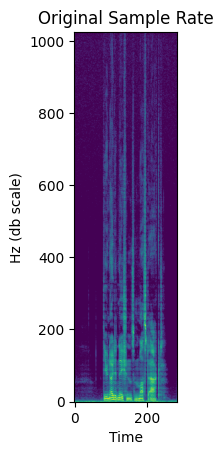

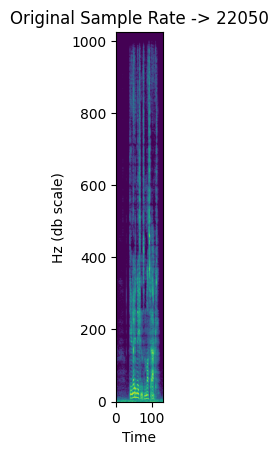

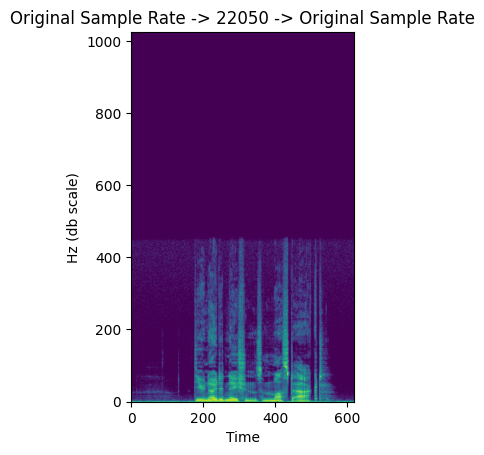

In [35]:
plt.title("Original Sample Rate")
plt.imshow(librosa.amplitude_to_db(np.abs(librosa.stft(sample_audio_or)), ref=np.max))
plt.xlabel('Time')
plt.ylabel('Hz (db scale)')
plt.gca().invert_yaxis()
plt.show()

plt.title("Original Sample Rate -> 22050")
plt.imshow(librosa.amplitude_to_db(np.abs(librosa.stft(sample_audio_or_2_22050)), ref=np.max))
plt.xlabel('Time')
plt.ylabel('Hz (db scale)')
plt.gca().invert_yaxis()
plt.show()

plt.title("Original Sample Rate -> 22050 -> Original Sample Rate")
plt.imshow(librosa.amplitude_to_db(np.abs(librosa.stft(sample_audio_or_2_22050_2_or)), ref=np.max))
plt.xlabel('Time')
plt.ylabel('Hz (db scale)')
plt.gca().invert_yaxis()
plt.show()

> <span style="color:red">**TODO**</span>: How does resampling work?

> <span style="color:red">**TODO**</span>: Why does resampling "not work" in the Spectral domain?

> **TODO**: Save all 3 waves and explore them in Audacity.

## Spectogram $\rightarrow$ MelSpectogram 

### Mel Scale

Studies have shown that humans do not perceive frequencies on a linear scale. We are better at detecting differences in lower frequencies than higher frequencies. For example, we can easily tell the difference between 500 and 1000 Hz, but we can hardly tell the difference between 10,000 and 10,500 Hz, even though the distance between the two pairs is the same.

In 1937, Stevens, Volkmann, and Newmann proposed a unit of pitch such that equal distances in pitch sounded equally distant to the listener. This is called the Mel scale. We perform a mathematical operation on frequencies to convert them to the Mel scale.

[Source](https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53).

So in order to move from Hz(f) to Mel(m), we need to perform the following transformation: $m = 2595 \cdot \log_{10}(1 + f/700) = 1127\cdot \ln(1+f/700)$.

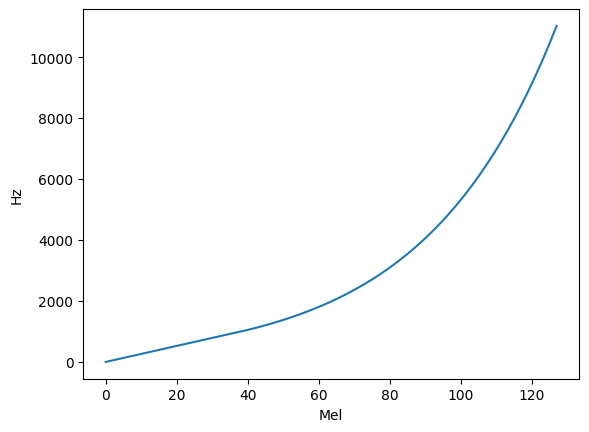

In [36]:
mel_freqs = librosa.mel_frequencies(n_mels=128, fmin=0.0, fmax=11025.0, htk=False)
plt.plot(mel_freqs)
plt.xlabel("Mel")
plt.ylabel("Hz")
plt.show()

In [37]:
Mel_audio_or = librosa.amplitude_to_db(librosa.feature.melspectrogram(y=sample_audio_or, sr=sample_audio_sr_or))

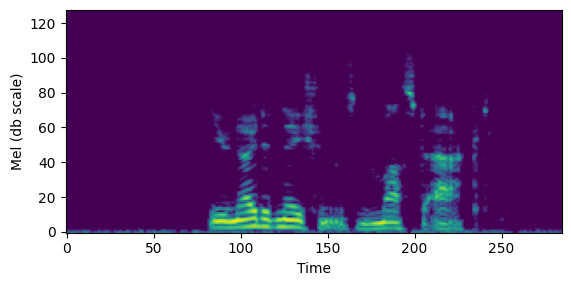

In [38]:
plt.imshow(Mel_audio_or)
plt.xlabel('Time')
plt.ylabel('Mel (db scale)')
plt.gca().invert_yaxis()
plt.show()

In [39]:
Mel_audio_22050 = librosa.amplitude_to_db(librosa.feature.melspectrogram(y=sample_audio_22050, sr=sample_audio_sr_22050))

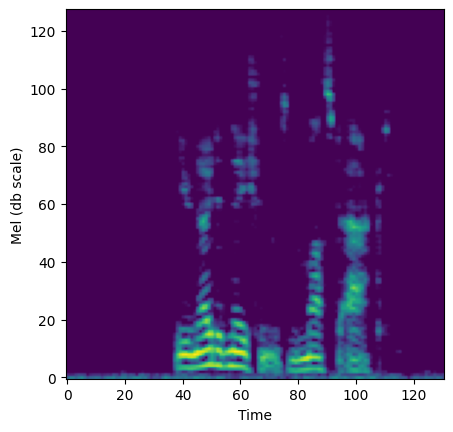

In [40]:
plt.imshow(Mel_audio_22050)
plt.xlabel('Time')
plt.ylabel('Mel (db scale)')
plt.gca().invert_yaxis()
plt.show()

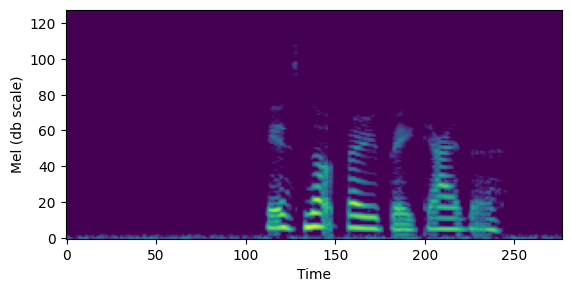

In [41]:
Mel_audio_2 = librosa.amplitude_to_db(librosa.feature.melspectrogram(y=sample_audio_2_or, sr=sample_audio_2_sr_or))
plt.imshow(Mel_audio_2)
plt.xlabel('Time')
plt.ylabel('Mel (db scale)')
plt.gca().invert_yaxis()
plt.show()

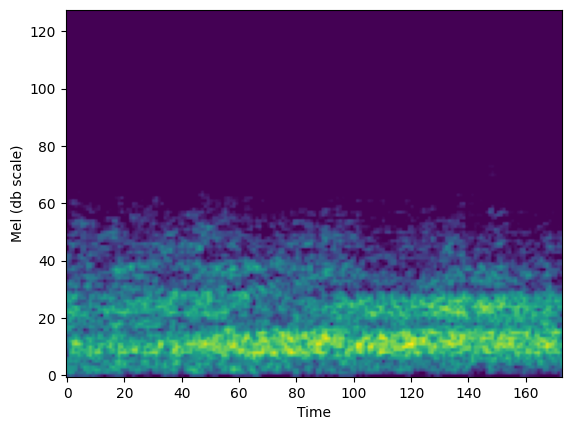

In [42]:
Mel_audio_3 = librosa.amplitude_to_db(librosa.feature.melspectrogram(y=sample_audio_3_or, sr=sample_audio_3_sr_or))
plt.imshow(Mel_audio_3)
plt.xlabel('Time')
plt.ylabel('Mel (db scale)')
plt.gca().invert_yaxis()
plt.show()

> **TODO**: Read about the Doppler effect. Find an audio sample on the Web that illustrates the Doppler effect better.

<a id='Homework'></a>
# Homework

Theory (5 points):
- Follow links.
- Try to fill **TODO** comments.
- Answer theory questions in the Google Form.

Practice (10 points):

- Implement your own `STFT` and `Melspectogram` modules. It is okay to look at `librosa` or other libraries' implementation. BUT DO NOT COPY PASTE! It can be computationally inefficient. The main idea is to figure out how it is done numerically.